# Air Abrosption Filter

In [97]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [98]:
def compute_air_absorption_coeffs(T, p_s, rel_humidity, F):
    ## Computes the air absorption coefficients alpha:
    #   T: temperature in Kelvin
    #   p_s: pressure in atm
    #   rel_humidity: relative humidity as a percentage
    #   F: frequencies to compute the coefficients for

    T_0 = 293.15        # Absolute atmospheric temperature
    p_s0 = 1            # Atmospheric Pressure in atm

    Csat = -6.8346 * (T_0 / T) ** 1.261 + 4.6151
    psat = 10 ** Csat
    H = H = psat * rel_humidity * p_s0 / p_s
    F_r0 = (p_s / p_s0) * (24 + 4.04 * 10**4 * H * (0.02 + H) / (0.391 + H))
    F_rN = (p_s / p_s0) * (T_0 / T)**(1/2) * ( 9 + 280 * H * np.exp(-4.17 * ((T_0 / T)**(1/3) - 1)))
    return 100 * F ** 2 * (((1.84*10**(-11))/((T_0 / T)**(1/2) * p_s / p_s0)) +
            (T_0 / T)**(5/2) * ( (0.1068 * np.exp(-3352/T) * F_rN) / (F**2 + F_rN**2) +
            (0.01278*np.exp(-2239.1 / T) * F_r0) / (F**2 + F_r0**2)))

def compute_air_absorption_filter(F, abs_coeffs, numtaps):
    norm_freqs = F / max(F)
    filt_coeffs = scipy.signal.firwin2(numtaps, norm_freqs, abs_coeffs)
    return filt_coeffs

In [99]:
T_0 = 293.15        # Absolute atmospheric temperature
T_celsius = 20      # Actual temperature
T = T_celsius + 273.15

p_s0 = 1            # Atmospheric Pressure in atm
p_s = 1             # Actual pressure in atm

hrar = 80           # Relative Humidity in %
F = np.linspace(0, 4000, num=9)


In [100]:
numtaps = 21
alpha = compute_air_absorption_coeffs(T, p_s, hrar, F)
filt_coeffs = compute_air_absorption_filter(F, alpha, numtaps)
w, H_fir = scipy.signal.freqz(filt_coeffs, a=1, worN = numtaps)
filt_coeffs

array([ 1.08852769e-04, -2.28318167e-04,  3.38157593e-04, -9.67198759e-04,
        1.42756588e-03, -3.60588279e-03,  5.76990471e-03, -1.41373109e-02,
        3.32392301e-02, -1.64771089e-01,  2.98796305e-01, -1.64771089e-01,
        3.32392301e-02, -1.41373109e-02,  5.76990471e-03, -3.60588279e-03,
        1.42756588e-03, -9.67198759e-04,  3.38157593e-04, -2.28318167e-04,
        1.08852769e-04])

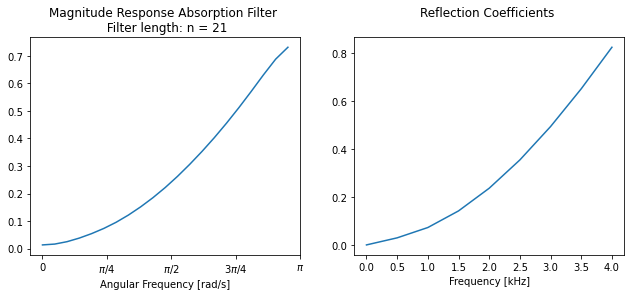

In [108]:
plt.figure()
plt.subplots_adjust(left=0.125, right=1.5)

plt.subplot(1,2,1)
plt.plot(w / np.pi, (abs(H_fir)))
plt.title('Magnitude Response Absorption Filter \n Filter length: n = %d' %numtaps)
# plt.title('Filter length: n = %d' %numtaps)
plt.xlabel('Angular Frequency [rad/s]')
plt.xticks(np.linspace(0, 1, 5), ['0', '$\pi$/4','$\pi$/2','3$\pi$/4','$\pi$'])

plt.subplot(1,2,2)
plt.plot(np.linspace(0,4,9), alpha)
plt.xlabel('Frequency [kHz]')
plt.title('Reflection Coefficients \n ')
plt.show()